### Planetary Moons Analysis
By Henry (and Thomas) Bechtel

Exploratory data analysis on factors influencing the number of moons each planet has (done with my 4yo son) 

In [48]:
using DataFrames, CSV, Plots, PyPlot, MultivariateStats

Creating dataframe manually from NASA's Planetary Fact Sheet

In [49]:
planetNames = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]
numMoons = [0, 0, 1, 2, 67, 62, 27, 14, 5]
planetMass = [0.33, 4.87, 5.97, 0.642, 1898, 568, 86.8, 102, 0.015]
distFromSun = [57.9, 108.2, 149.6, 227.9, 778.6, 1433.5, 2872.5, 4495.1, 5906.4];

In [50]:
df = DataFrame(Planet = planetNames, Moons = numMoons, Mass = planetMass, Dist = distFromSun)

,Planet,Moons,Mass,Dist
1,Mercury,0,0.33,57.9
2,Venus,0,4.87,108.2
3,Earth,1,5.97,149.6
4,Mars,2,0.642,227.9
5,Jupiter,67,1898.0,778.6
6,Saturn,62,568.0,1433.5
7,Uranus,27,86.8,2872.5
8,Neptune,14,102.0,4495.1
9,Pluto,5,0.015,5906.4


Or... reading in a saved csv

In [51]:
df = readtable("PlanetMoons.csv")

,x,Num_of_Moons,Planet_Mass_10_24_kg_,Dist_from_Sun_10_6_km_
1,Mercury,0,0.33,57.9
2,Venus,0,4.87,108.2
3,Earth,1,5.97,149.6
4,Mars,2,0.642,227.9
5,Jupiter,67,1898.0,778.6
6,Saturn,62,568.0,1433.5
7,Uranus,27,86.8,2872.5
8,Neptune,14,102.0,4495.1
9,Pluto,5,0.015,5906.4


I'd like to change the column names for the rest of this analysis

In [52]:
print(names(df))

Symbol[:x, :Num_of_Moons, :Planet_Mass_10_24_kg_, :Dist_from_Sun_10_6_km_]

In [53]:
names!(df, [:Planet, :Moons, :Mass, :Dist])

,Planet,Moons,Mass,Dist
1,Mercury,0,0.33,57.9
2,Venus,0,4.87,108.2
3,Earth,1,5.97,149.6
4,Mars,2,0.642,227.9
5,Jupiter,67,1898.0,778.6
6,Saturn,62,568.0,1433.5
7,Uranus,27,86.8,2872.5
8,Neptune,14,102.0,4495.1
9,Pluto,5,0.015,5906.4


Let's look at the mass of the planet and its relationship with the number of moons, since it seems the most obvious:

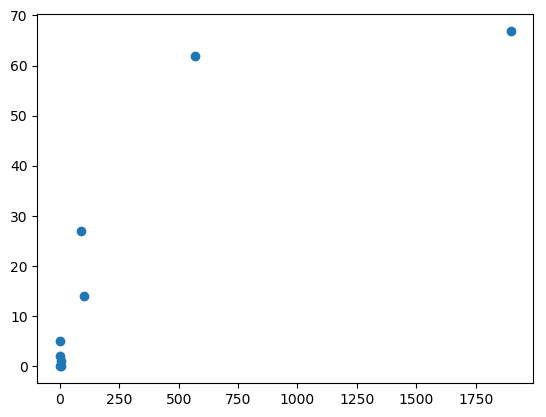

In [54]:
PyPlot.scatter(df[:Mass],df[:Moons]);

Let's take the square root of the planet's mass to see if that linearizes the realationship

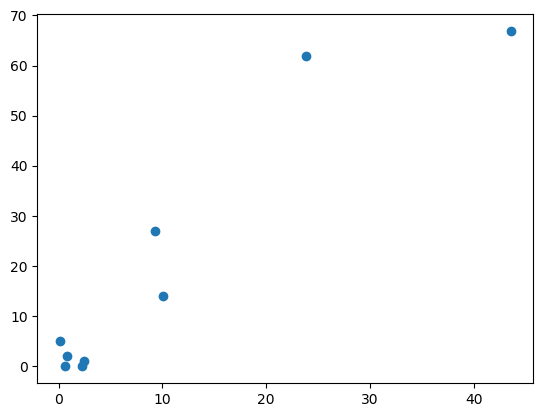

In [55]:
df[:SqrtMass] = sqrt(df[:Mass])
PyPlot.scatter(df[:SqrtMass],df[:Moons]);

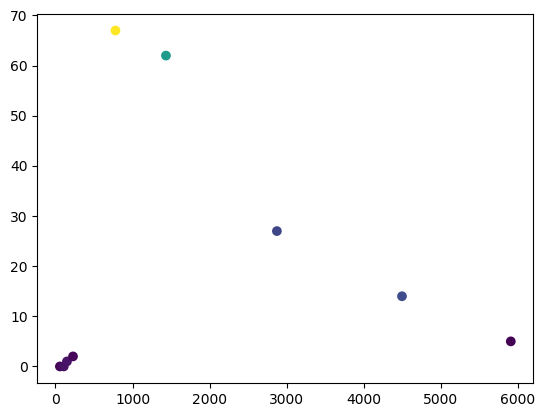

In [56]:
PyPlot.scatter(df[:Dist],df[:Moons], c=df[:SqrtMass]);

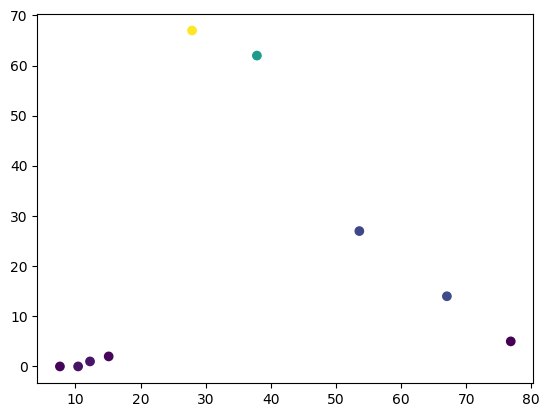

In [57]:
df[:SqrtDist] = sqrt(df[:Dist]);
PyPlot.scatter(df[:SqrtDist],df[:Moons], c=df[:SqrtMass]);

In [58]:
?svd

search: svd svds svdvals svdfact svdvals! svdfact! pcasvd ccasvd isvalid



```
svd(A; thin::Bool=true) -> U, S, V
```

Computes the SVD of `A`, returning `U`, vector `S`, and `V` such that `A == U*diagm(S)*V'`. The singular values in `S` are sorted in descending order.

If `thin=true` (default), a thin SVD is returned. For a $M \times N$ matrix `A`, `U` is $M \times M$ for a full SVD (`thin=false`) and $M \times \min(M, N)$ for a thin SVD.

`svd` is a wrapper around [`svdfact`](@ref), extracting all parts of the `SVD` factorization to a tuple. Direct use of `svdfact` is therefore more efficient.

# Example

```jldoctest
julia> A = [1. 0. 0. 0. 2.; 0. 0. 3. 0. 0.; 0. 0. 0. 0. 0.; 0. 2. 0. 0. 0.]
4×5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  2.0
 0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0

julia> U, S, V = svd(A)
([0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 -1.0; 0.0 0.0 1.0 0.0], [3.0, 2.23607, 2.0, 0.0], [-0.0 0.447214 -0.0 0.0; 0.0 0.0 1.0 0.0; … ; -0.0 0.0 -0.0 1.0; 0.0 0.894427 0.0 0.0])

julia> U*diagm(S)*V'
4×5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  2.0
 0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0
```

```
svd(A, B) -> U, V, Q, D1, D2, R0
```

Wrapper around [`svdfact`](@ref) extracting all parts of the factorization to a tuple. Direct use of `svdfact` is therefore generally more efficient. The function returns the generalized SVD of `A` and `B`, returning `U`, `V`, `Q`, `D1`, `D2`, and `R0` such that `A = U*D1*R0*Q'` and `B = V*D2*R0*Q'`.


In [59]:
X = df[:,[:Moons, :SqrtMass, :SqrtDist]]

,Moons,SqrtMass,SqrtDist
1,0,0.5744562646538028,7.60920495189872
2,0,2.2068076490713913,10.401922899156675
3,1,2.4433583445741234,12.231107881136523
4,2,0.8012490249604052,15.096357176484664
5,67,43.56604182158393,27.903404810166087
6,62,23.83275057562597,37.8615900352851
7,27,9.316651759081692,53.59570878344646
8,14,10.099504938362077,67.04550693372376
9,5,0.1224744871391589,76.85310663857382


In [77]:
Xstd = copy(X)
Xstd[:Moons]=Float64(Xstd[:Moons])

for i in 1:nrow(X)
    for j in 1:ncol(X)
        Xstd[i,j] = (X[i,j]-mean(X[:,j]))/std(X[:,j])
    end
end

LoadError: [91mMethodError: Cannot `convert` an object of type DataArrays.DataArray{Int64,1} to an object of type Float64
This may have arisen from a call to the constructor Float64(...),
since type constructors fall back to convert methods.[39m

In [61]:
i=1
j=1

1

In [72]:
Float32(Xstd[i,j])

0.0f0

In [80]:
showcols(Xstd)

9×3 DataFrames.DataFrame
│ Col # │ Name     │ Eltype  │ Missing │
├───────┼──────────┼─────────┼─────────┤
│ 1     │ Moons    │ Int64   │ 0       │
│ 2     │ SqrtMass │ Float64 │ 0       │
│ 3     │ SqrtDist │ Float64 │ 0       │

In [81]:
int_to_float(str) = try convert(Int64, Float64) catch return(NA) end

int_to_float (generic function with 1 method)

In [83]:
Xstd[:Moons] = map(int_to_float, Xstd[:Moons])

9-element DataArrays.DataArray{DataArrays.NAtype,1}:
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA